<a href="https://colab.research.google.com/github/rohit958/Coursera_repo/blob/main/WildFireAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import folium

In [3]:
%matplotlib inline

## Dataset loading

In [5]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(URL)

In [6]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [7]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [8]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [10]:
import datetime as dt

In [11]:
df['Year']=pd.to_datetime(df['Date']).dt.year
df['Month']=pd.to_datetime(df['Date']).dt.month
df['Date']=pd.to_datetime(df['Date'])

In [14]:
df.dtypes

Region                                         object
Date                                   datetime64[ns]
Estimated_fire_area                           float64
Mean_estimated_fire_brightness                float64
Mean_estimated_fire_radiative_power           float64
Mean_confidence                               float64
Std_confidence                                float64
Var_confidence                                float64
Count                                           int64
Replaced                                       object
Year                                            int32
Month                                           int32
dtype: object

## TASK 1.1: Let's try to understand the change in average estimated fire area over time

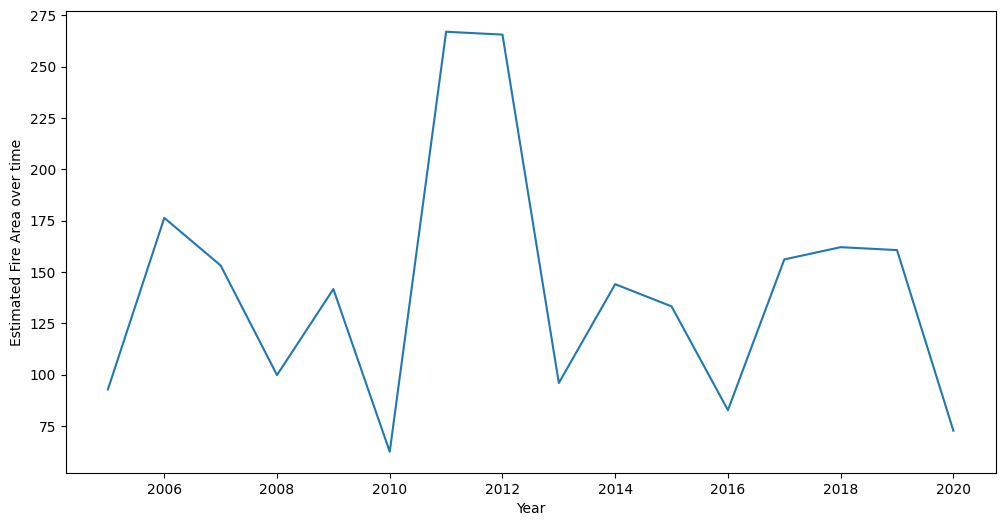

In [23]:
fig=plt.figure(figsize=(12,6))

df1=df.groupby('Year')['Estimated_fire_area'].mean()
df1.plot(x=df1.index,y=df1.values)

plt.xlabel('Year')
plt.ylabel('Estimated Fire Area over time')
plt.show()

## TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

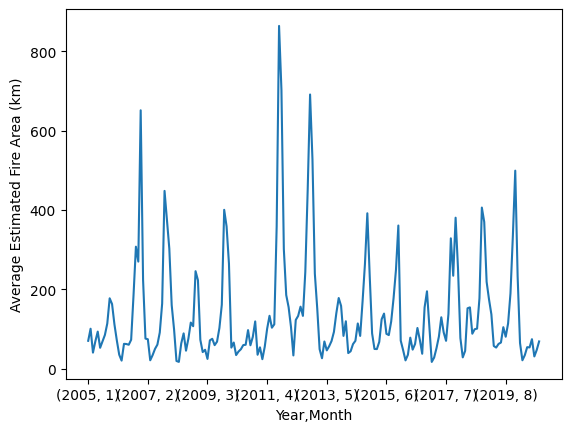

In [30]:

df2=df.groupby(['Year','Month'])['Estimated_fire_area'].mean()

df2.plot(x=df2.index,y=df2.values)
plt.xlabel('Year,Month')
plt.ylabel('Average Estimated Fire Area (km)')
plt.show()

## TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions
use the functionality of seaborn to develop a barplot

In [33]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

Text(0.5, 1.0, 'distribution of mean estimated fire brightness across the regions')

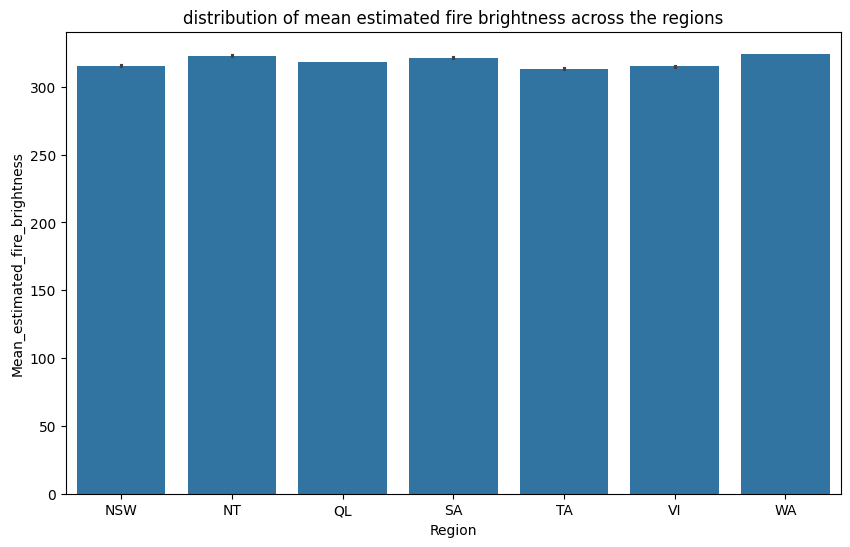

In [41]:
fig=plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Region',y='Mean_estimated_fire_brightness')
plt.title('distribution of mean estimated fire brightness across the regions')

## TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions we will develop a pie chart for this

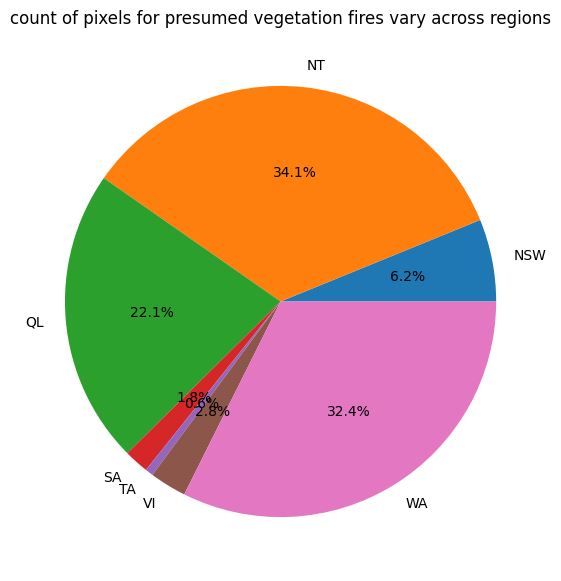

In [69]:
df3=df.groupby('Region')['Count'].sum()
labels=['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA']
fig=plt.figure(figsize=(10,7))

plt.pie(df3,labels=df3.index,autopct='%1.1f%%')
plt.title('count of pixels for presumed vegetation fires vary across regions')

plt.show()

## task 1.6  Let's try to develop a histogram of the mean estimated fire brightness
Using Matplotlib to create the histogram

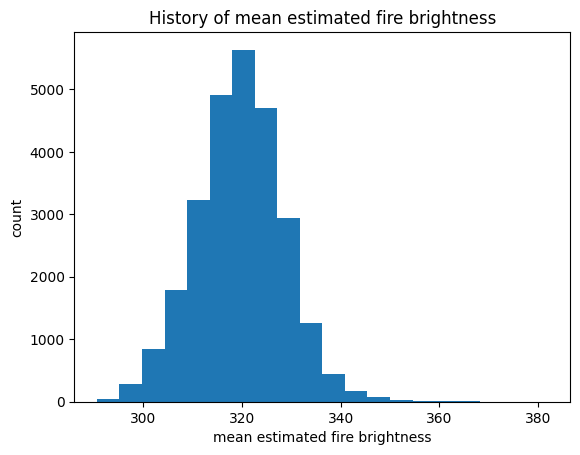

In [74]:
plt.hist(data=df,x='Mean_estimated_fire_brightness', bins=20)
plt.title('History of mean estimated fire brightness')
plt.xlabel('mean estimated fire brightness')
plt.ylabel('count')

plt.show()

## TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and pass region as hue

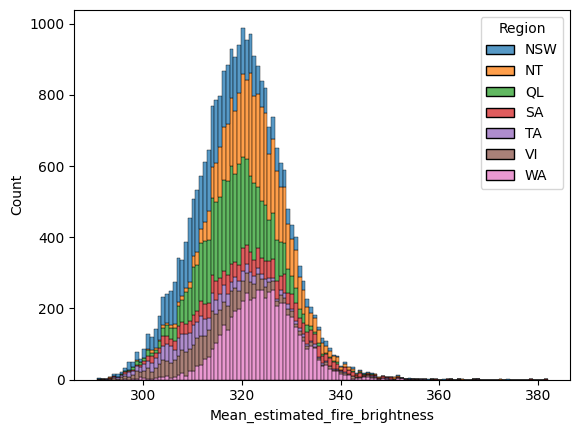

In [76]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region',multiple='stack')
plt.show()

## Task1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?

In [77]:
df[['Mean_estimated_fire_radiative_power','Mean_confidence']].corr()

,Mean_estimated_fire_radiative_power,Mean_confidence
Mean_estimated_fire_radiative_power,1.000000,0.452322
Mean_confidence,0.452322,1.000000


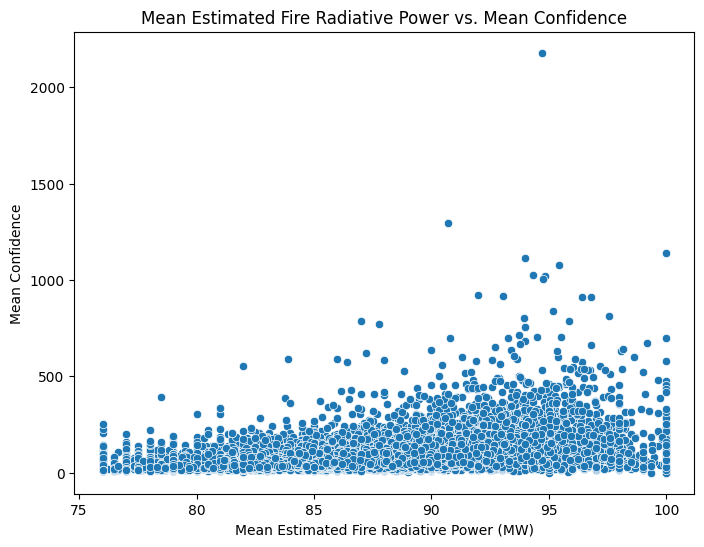

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

## TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium

In [80]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411],
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [81]:
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)